2.10022836462
AxesSubplot(0.125,0.125;0.775x0.755)


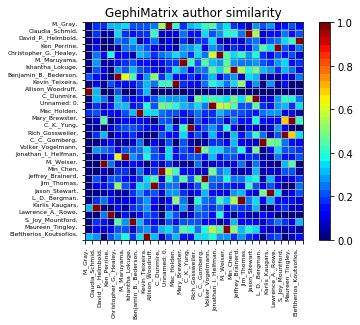

AxesSubplot(0.125,0.125;0.775x0.755)


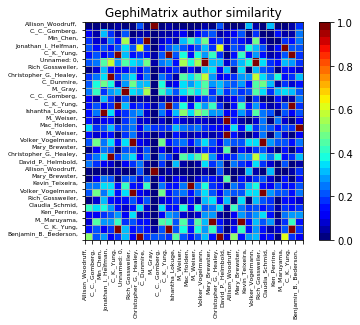

In [99]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from pandas import DataFrame, read_csv
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.spatial.distance import squareform

def plotdf(df):
    # plots dataframe
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    print(ax1)
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(df, interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title('GephiMatrix author similarity')
    labels=[]
    for i in df:
        labels.append(i+',')
    
    ax1.xaxis.set_major_locator(plt.LinearLocator(numticks=df.shape[0]+1))
    ax1.yaxis.set_major_locator(plt.LinearLocator(numticks=df.shape[1]+1))
    ax1.set_xticklabels(labels,fontsize=6,rotation=90)
    ax1.set_yticklabels(labels,fontsize=6)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=[-1,-.8, -.6, -.4, -0.2, 0, .2,.4,.6,.8,1])
    plt.show()
    

# Read file into a Pandas dataframe
f = "C:/Users/s165698/.jupyter/GephiMatrix_author_similarity.csv" 
df = read_csv(f, sep=';', header = 0, index_col = 0)

# Reduce problem size for test purposes
n=30
df = df.iloc[:n,:n]
#print(df)
#print(df.shape)

# Compute correlations
#corr = df.corr().values

# determine clusters
#dissimilarity = 1 - np.abs(corr)
#hierarchy = linkage(squareform(dissimilarity), method='average')
#dissimilarity = 1 - np.abs(corr)
pdist = spc.distance.pdist(df)
print(pdist.max())
#meth='single'
#meth='complete'
meth='average'
#meth='weighted'
#meth='centroid'
hierarchy = linkage(pdist, method=meth)
#crit='inconsistent'
crit='distance'
#crit='maxclust'
index = fcluster(hierarchy, 0.5*pdist.max(), criterion=crit)

columns = [df.columns.tolist()[i] for i in list(np.argsort(index))]
df = df.reindex_axis(columns, axis=1)

#print(labels)
#print(df.iloc[labels-1])

# plot sorted dataframe
plotdf(df)
plotdf(df.iloc[index-1, index-1])



In [1]:
import pandas as pd
import scipy.cluster.hierarchy as spc

corr = df.corr().values
print(corr)

pdist = spc.distance.pdist(corr)
linkage = spc.linkage(pdist, method='complete')
idx = spc.fcluster(linkage, 0.5 * pdist.max(), 'distance')




#corr = df.corrcoef(df, header = Null, index_col = 5)  # 20 by 20 correlation matrix
#corr = (corr + corr.T)/2                         # made symmetric
np.fill_diagonal(corr, 1)                        # put 1 on the diagonal


from scipy.cluster.hierarchy import linkage, fcluster
from scipy.spatial.distance import squareform

dissimilarity = 1 - np.abs(corr)
hierarchy = linkage(squareform(dissimilarity), method='average')
labels = fcluster(hierarchy, 0.5, criterion='distance')

NameError: name 'df' is not defined